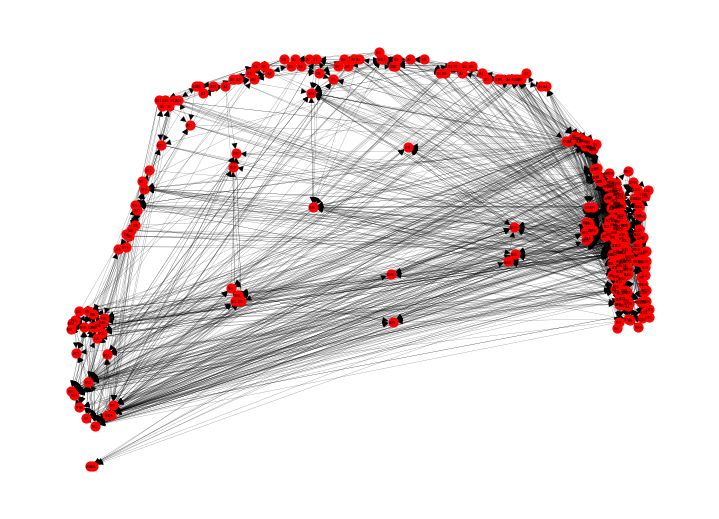

In [64]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load node labels
labels_df = pd.read_csv(r'D:\Complex Systems Project\Data Sets\Dataset 02\celegans277labels.csv', header=None, names=['label'])

# Load node positions
positions_df = pd.read_csv(r'D:\Complex Systems Project\Data Sets\Dataset 02\celegans277positions.csv', header=None, names=['X', 'Y'])

# Load adjacency matrix
adjacency_matrix_df = pd.read_csv(r'D:\Complex Systems Project\Data Sets\Dataset 02\celegans277matrix.csv', header=None)

# Create a graph
G = nx.DiGraph()

# Add nodes with labels and positions
for i, row in labels_df.iterrows():
    node_id = i  # Assuming node IDs start from 0
    G.add_node(node_id, label=row['label'],
               pos=(positions_df.loc[i,'X'], positions_df.loc[i,'Y']))

# Add edges with weights from the adjacency matrix
for i in range(len(adjacency_matrix_df)):
    for j in range(len(adjacency_matrix_df)):
        weight = adjacency_matrix_df.iloc[i, j]
        if weight == 1:
            G.add_edge(i, j)  # Assuming node IDs start from 0
fig=plt.figure(figsize=(7,5))
# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        font_size=2, node_size=40, font_color='black', width = 0.1, node_color='red')

plt.savefig("network.png",dpi=500)
plt.show()


### Setting up a simulation algorithm

Information flow starting from node 128 reached 43 nodes within 2 steps.


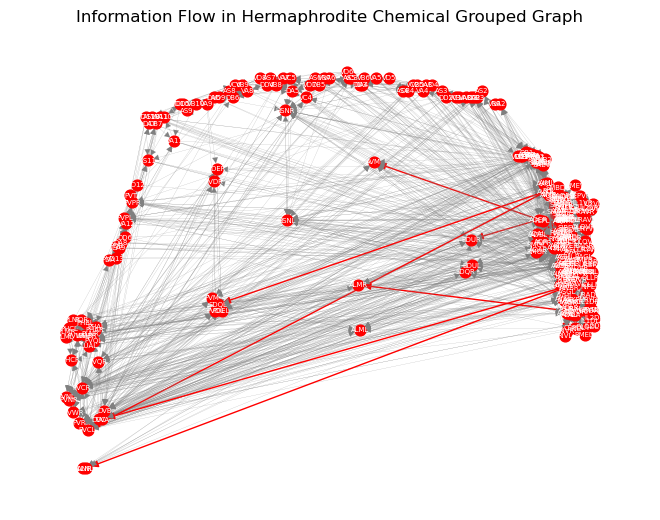

In [2]:
# Simulate information flow using BFS with a maximum depth of 1
start_node = 128
max_depth = 2
visited_nodes = set()
edge_flows = []

queue = [(start_node, 0, None)]  # Use a tuple to keep track of the depth and the edge leading to the node

while queue:
    current_node, depth, parent_edge = queue.pop(0)
    if current_node not in visited_nodes and depth <= max_depth:
        visited_nodes.add(current_node)
        if parent_edge is not None:
            edge_flows.append(parent_edge)
        neighbors = list(G.neighbors(current_node))
        queue.extend((neighbor, depth + 1, (current_node, neighbor)) for neighbor in neighbors)

edge_widths = [1 if edge in edge_flows else 0.1 for edge in G.edges()]
edge_colors = ['red' if edge in edge_flows else 'gray' for edge in G.edges()]
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_color='red',font_color='white', node_size=60, font_size=5, edge_color=edge_colors, width=edge_widths)

# Deduce interpretation from the observation
print(f"Information flow starting from node {start_node} reached {len(visited_nodes)} nodes within {max_depth} steps.")

plt.title('Information Flow in Hermaphrodite Chemical Grouped Graph')
plt.show()


#### Defining the algorithm for a given node

Information flow starting from node OLLL reached 23 nodes within 2 steps.


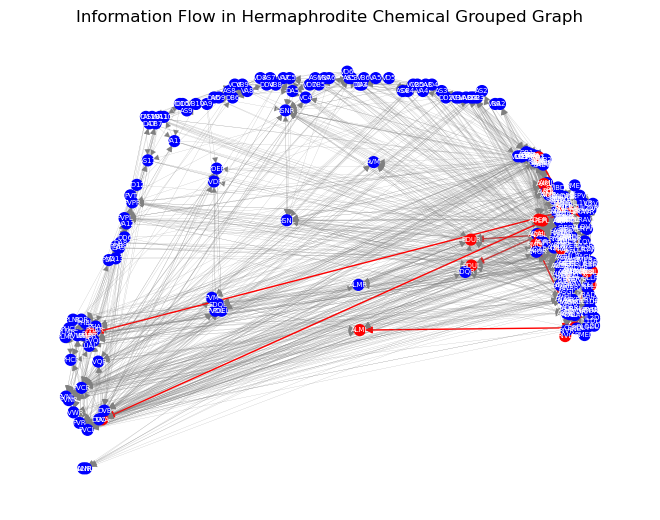

In [3]:
# Function to simulate information flow using BFS
def simulate_information_flow(graph, start_label, max_depth):
    visited_nodes = set()
    edge_flows = []
    queue = [(start_label, 0, None)]  # Use a tuple to keep track of the depth and the edge leading to the node

    while queue:
        current_label, depth, parent_edge = queue.pop(0)
        current_node = next((node for node, label in nx.get_node_attributes(graph, 'label').items() if label == current_label), None)

        if current_node is not None and current_node not in visited_nodes and depth <= max_depth:
            visited_nodes.add(current_node)
            if parent_edge is not None:
                edge_flows.append(parent_edge)
            neighbors = list(graph.neighbors(current_node))
            queue.extend([(graph.nodes[neighbor]['label'], depth + 1, (current_node, neighbor)) for neighbor in neighbors])

    return visited_nodes, edge_flows

# Specify the starting node label and maximum depth for information flow simulation
start_label = 'OLLL'
max_depth = 2

# Simulate information flow
visited_nodes, edge_flows = simulate_information_flow(G, start_label, max_depth)

# Draw the graph highlighting nodes and edges involved in the information flow
pos = nx.get_node_attributes(G, 'pos')
edge_widths = [1 if edge in edge_flows else 0.1 for edge in G.edges()]
edge_colors = ['red' if edge in edge_flows else 'gray' for edge in G.edges()]
node_colors = ['red' if node in visited_nodes else 'blue' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_color=node_colors, font_color='white', node_size=60, font_size=5, edge_color=edge_colors, width=edge_widths)

# Deduce interpretation from the observation
print(f"Information flow starting from node {start_label} reached {len(visited_nodes)} nodes within {max_depth} steps.")

plt.title('Information Flow in Hermaphrodite Chemical Grouped Graph')
plt.show()

### Consider the set of neurons under Sensory Neuron : 1 category. Establish the visuals for the flow of information.

Information flow starting from nodes ['IL2DL', 'IL2DR', 'IL2L', 'IL2R', 'IL2VL', 'IL2VR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'URYDL', 'URYDR', 'URYVL', 'URYVR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR'] reached 49 nodes within 1 steps.


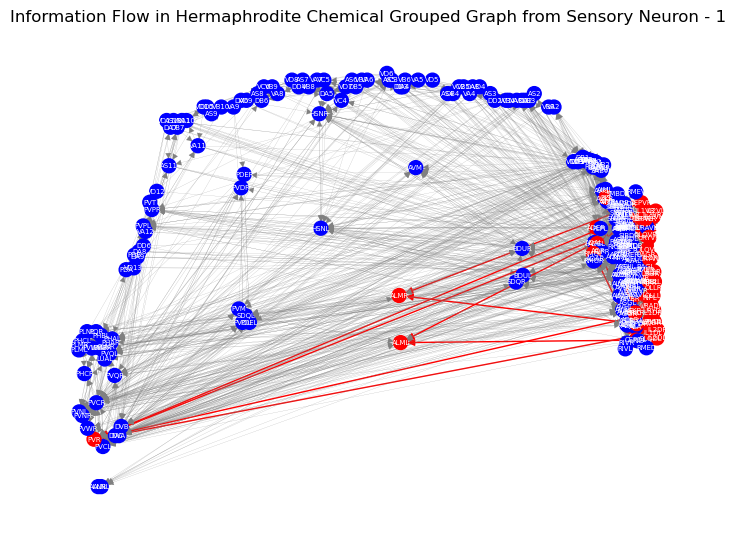

In [65]:
# Function to simulate information flow using BFS
def simulate_information_flow(graph, start_labels, max_depth):
    all_visited_nodes = set()
    all_edge_flows = []

    for start_label in start_labels:
        visited_nodes = set()
        edge_flows = []
        queue = [(start_label, 0, None)]  # Use a tuple to keep track of the depth and the edge leading to the node

        while queue:
            current_label, depth, parent_edge = queue.pop(0)
            current_node = next((node for node, label in nx.get_node_attributes(graph, 'label').items() if label == current_label), None)

            if current_node is not None and current_node not in visited_nodes and depth <= max_depth:
                visited_nodes.add(current_node)
                if parent_edge is not None:
                    edge_flows.append(parent_edge)
                neighbors = list(graph.neighbors(current_node))
                queue.extend([(graph.nodes[neighbor]['label'], depth + 1, (current_node, neighbor)) for neighbor in neighbors])

        all_visited_nodes.update(visited_nodes)
        all_edge_flows.extend(edge_flows)

    return all_visited_nodes, all_edge_flows

# Specify an array of starting node labels and maximum depth for information flow simulation
start_labels = ['IL2DL','IL2DR','IL2L','IL2R','IL2VL','IL2VR','CEPDL','CEPDR','CEPVL','CEPVR','URYDL','URYDR','URYVL','URYVR','OLLL','OLLR','OLQDL','OLQDR','OLQVL','OLQVR','IL1DL','IL1DR','IL1L','IL1R','IL1VL','IL1VR']  # Replace with the desired node labels
max_depth = 1

# Simulate information flow
visited_nodes, edge_flows = simulate_information_flow(G, start_labels, max_depth)

# Draw the graph highlighting nodes and edges involved in the information flow
pos = nx.get_node_attributes(G, 'pos')
edge_widths = [1 if edge in edge_flows else 0.1 for edge in G.edges()]
edge_colors = ['red' if edge in edge_flows else 'gray' for edge in G.edges()]
node_colors = ['red' if node in visited_nodes else 'blue' for node in G.nodes()]
fig=plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_color=node_colors, font_color='white', node_size=100, font_size=5, edge_color=edge_colors, width=edge_widths)

# Deduce interpretation from the observation
print(f"Information flow starting from nodes {start_labels} reached {len(visited_nodes)} nodes within {max_depth} steps.")

plt.title('Information Flow in Hermaphrodite Chemical Grouped Graph from Sensory Neuron - 1')
plt.savefig("SN1_info.png",dpi=500)
plt.show()

In [19]:
print("Labels of nodes to which information had traveled:")
for node in visited_nodes:
    print(G.nodes[node]['label'])

Labels of nodes to which information had traveled:
OLLR
OLQDL
ADEL
OLQVL
OLQVR
ADER
OLQDR
ADLR
ADFL
ADLL
ALML
ALMR
PVR
RIAR
RIH
RIPL
RIPR
RIS
RMDL
RMGL
SAADR
SAAVL
CEPDL
CEPDR
CEPVL
CEPVR
URADL
URADR
URAVR
URBL
URBR
URXR
URYDL
URYDR
URYVL
URYVR
IL1DL
IL1DR
IL1L
IL1R
IL1VL
IL1VR
IL2DL
IL2DR
IL2L
IL2R
IL2VL
IL2VR
OLLL


##### Among these : 
######              IN 1:RIAR
######              IN 2:RMGL,SAADR,SAAVL
######              IN 3:RIS,PVR
######              IN 4:RIH, URBL, URBR
              
###### SO, the SN 1 differentially target the IN 2 and IN 4 layers, with less involvement if IN 1 and IN 3 layers.

Information flow starting from nodes ['RMGL', 'SAADR', 'SAAVL', 'RIH', 'URBL', 'URBR'] reached 38 nodes within 1 steps.


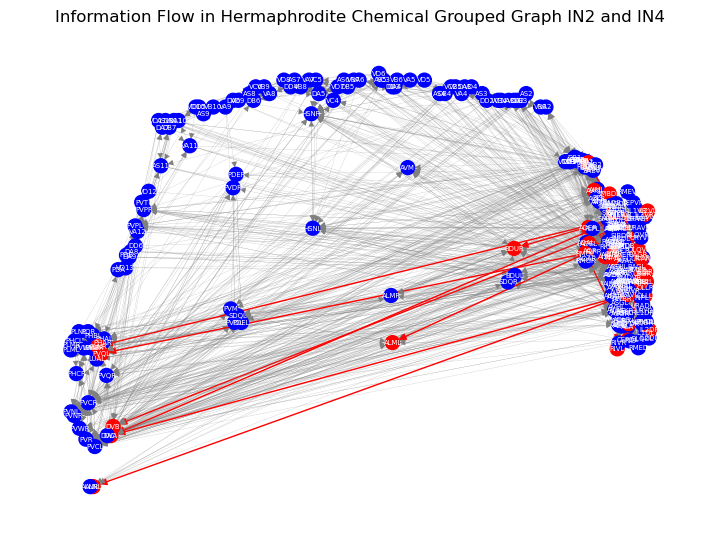

In [66]:
# Specify an array of starting node labels and maximum depth for information flow simulation
start_labels = ['RMGL','SAADR','SAAVL','RIH','URBL','URBR']  # Replace with the desired node labels
max_depth = 1

# Simulate information flow
visited_nodes, edge_flows = simulate_information_flow(G, start_labels, max_depth)

# Draw the graph highlighting nodes and edges involved in the information flow
pos = nx.get_node_attributes(G, 'pos')
edge_widths = [1 if edge in edge_flows else 0.1 for edge in G.edges()]
edge_colors = ['red' if edge in edge_flows else 'gray' for edge in G.edges()]
node_colors = ['red' if node in visited_nodes else 'blue' for node in G.nodes()]
fig=plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_color=node_colors, font_color='white', node_size=100, font_size=5, edge_color=edge_colors, width=edge_widths)

# Deduce interpretation from the observation
print(f"Information flow starting from nodes {start_labels} reached {len(visited_nodes)} nodes within {max_depth} steps.")

plt.title('Information Flow in Hermaphrodite Chemical Grouped Graph IN2 and IN4')
plt.savefig("IN_24_info.png",dpi=500)
plt.show()

In [6]:
print("Labels of nodes to which information had traveled:")
for node in visited_nodes:
    print(G.nodes[node]['label'])

Labels of nodes to which information had traveled:
ADEL
ADER
OLQVL
OLQVR
PLNR
AIZL
ALML
ALNL
PVQL
RIAR
RIBR
RIH
RIML
RIMR
RIVL
AVKL
RMGL
RMHR
SAADL
SAADR
SAAVL
BDUR
CEPDL
CEPDR
SMBDR
SMBVR
URBL
URBR
URYVL
DVA
DVB
VB1
IL2DR
IL2L
IL2R
IL2VL
IL2VR
OLLL


##### Among these: Head Motor Neurons : RIVL,RMHR ; Sublateral motor neurons : SMBDR,SMBVR
             
###### Head Motor Neurons :  innervate the muscles in the anterior body region (URA, RME, RMD, RIV and RMH)
###### Sublateral Motor Neurons : have muscle output from axons that extend longitudinally in sublateral tracts adjacent to each of the four muscle quadrants


### Consider the set of neurons under Sensory Neuron : 6 category (Thermosensory). Establish the visuals for the flow of information.

Information flow starting from nodes ['ASIL', 'ASIR', 'ASJL', 'ASJR', 'AWAL', 'AWAR', 'ASGL', 'ASGR', 'AWBL', 'AWBR', 'ASEL', 'ASER', 'ADFL', 'ADFR', 'AFDL', 'AFDR', 'AWCL', 'AWCR', 'ASKL', 'ASKR'] reached 41 nodes within 1 steps.


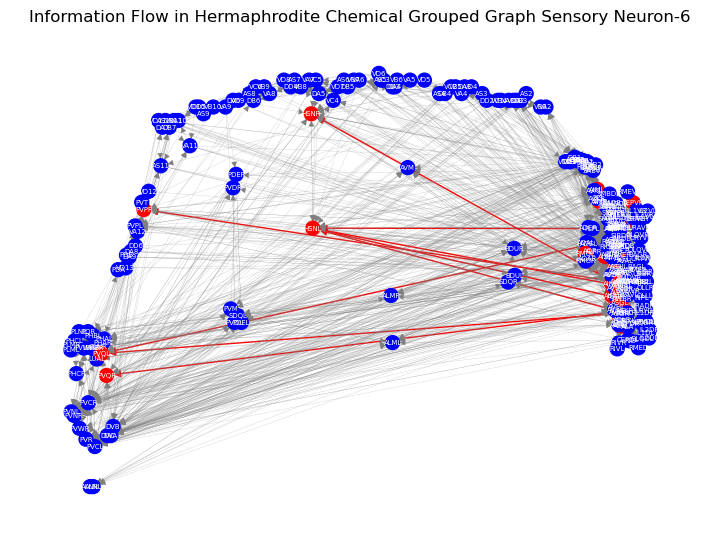

In [67]:
# Specify an array of starting node labels and maximum depth for information flow simulation
start_labels = ['ASIL','ASIR','ASJL','ASJR','AWAL','AWAR','ASGL','ASGR','AWBL','AWBR','ASEL','ASER','ADFL','ADFR','AFDL','AFDR','AWCL','AWCR','ASKL','ASKR']  # Replace with the desired node labels
max_depth = 1

# Simulate information flow
visited_nodes, edge_flows = simulate_information_flow(G, start_labels, max_depth)

# Draw the graph highlighting nodes and edges involved in the information flow
pos = nx.get_node_attributes(G, 'pos')
edge_widths = [1 if edge in edge_flows else 0.1 for edge in G.edges()]
edge_colors = ['red' if edge in edge_flows else 'gray' for edge in G.edges()]
node_colors = ['red' if node in visited_nodes else 'blue' for node in G.nodes()]
fig=plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_color=node_colors, font_color='white', node_size=100, font_size=5, edge_color=edge_colors, width=edge_widths)

# Deduce interpretation from the observation
print(f"Information flow starting from nodes {start_labels} reached {len(visited_nodes)} nodes within {max_depth} steps.")

plt.title('Information Flow in Hermaphrodite Chemical Grouped Graph Sensory Neuron-6')
plt.savefig("SN6_info.png",dpi=500)
plt.show()

In [14]:
print("Labels of nodes to which information had traveled:")
for node in visited_nodes:
    print(G.nodes[node]['label'])

Labels of nodes to which information had traveled:
ADFL
ADFR
ADLL
ADLR
AFDL
AFDR
AIAL
AIAR
AIML
AIMR
AINL
AINR
AIYR
AIZL
PVPR
PVQL
PVQR
ASEL
ASER
ASGL
ASGR
ASHL
ASHR
ASIL
ASIR
ASJL
ASJR
ASKL
ASKR
RIH
AVHL
RMGL
AWAL
AWAR
AWBL
AWBR
AWCL
AWCR
CEPVR
HSNL
HSNR


#### Among these :
###### IN 4 : AINL,AINR,AIML,AIMR,RIH
###### IN 3 : AIYR,AIAL,AIAR,AIZL,PVQL,PVQR,AVHL,PVPR
###### IN 2 : RMGL

##### So , SN 6 preferentially target the IN 3 layer, with smaller involvement of IN 2 and IN4 layers.

Information flow starting from nodes ['AIYR', 'AIAL', 'AIAR', 'AIZL', 'PVQL', 'PVQR', 'AVHL', 'PVPR', 'AINL', 'AINR', 'AIML', 'AIMR', 'RIH'] reached 135 nodes within 2 steps.


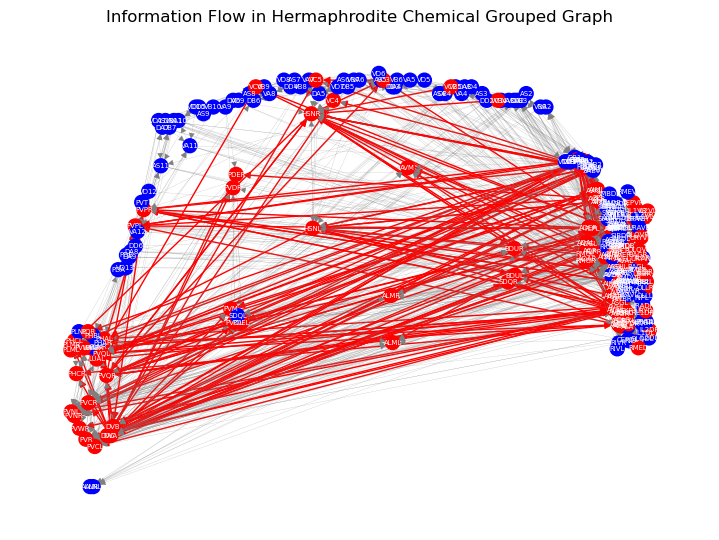

In [68]:
# Specify an array of starting node labels and maximum depth for information flow simulation
start_labels = ['AIYR','AIAL','AIAR','AIZL','PVQL','PVQR','AVHL','PVPR','AINL','AINR','AIML','AIMR','RIH']  # Replace with the desired node labels
max_depth = 2

# Simulate information flow
visited_nodes, edge_flows = simulate_information_flow(G, start_labels, max_depth)

# Draw the graph highlighting nodes and edges involved in the information flow
pos = nx.get_node_attributes(G, 'pos')
edge_widths = [1 if edge in edge_flows else 0.1 for edge in G.edges()]
edge_colors = ['red' if edge in edge_flows else 'gray' for edge in G.edges()]
node_colors = ['red' if node in visited_nodes else 'blue' for node in G.nodes()]
fig=plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
        node_color=node_colors, font_color='white', node_size=100, font_size=5, edge_color=edge_colors, width=edge_widths)

# Deduce interpretation from the observation
print(f"Information flow starting from nodes {start_labels} reached {len(visited_nodes)} nodes within {max_depth} steps.")

plt.title('Information Flow in Hermaphrodite Chemical Grouped Graph')
plt.savefig("IN3_info.png",dpi=500)
plt.show()

In [14]:
print("Labels of nodes to which information had traveled:")
for node in visited_nodes:
    print(G.nodes[node]['label'])

Labels of nodes to which information had traveled:
ADAL
ADAR
ADEL
ADER
ADFL
ADFR
ADLL
ADLR
AFDL
AFDR
AIAL
AIAR
AIML
AIMR
AINL
AINR
AIYR
AIZL
AIZR
ALML
ALMR
AQR
ASEL
ASER
ASGL
ASGR
ASHL
ASHR
ASIL
ASIR
ASJL
ASJR
ASKL
ASKR
AUAR
AVAL
AVAR
AVBL
AVBR
AVEL
AVER
AVFL
AVFR
AVG
AVHL
AVHR
AVJL
AVJR
AVKL
AVKR
AVL
AVM
AWAL
AWAR
AWBL
AWBR
AWCL
AWCR
BAGL
BAGR
BDUL
BDUR
CEPDR
CEPVL
CEPVR
DVA
DVB
DVC
FLPL
FLPR
HSNL
HSNR
IL1VL
IL1VR
IL2DR
IL2L
IL2R
IL2VL
IL2VR
LUAL
LUAR
OLLR
OLQVL
OLQVR
PDEL
PDER
PHAL
PHAR
PHCL
PHCR
PLML
PLMR
PQR
PVCL
PVCR
PVDL
PVDR
PVM
PVNL
PVNR
PVPL
PVPR
PVQL
PVQR
PVR
PVWL
PVWR
RIBR
RIFL
RIFR
RIGL
RIGR
RIH
RIMR
RIR
RIS
RMDR
RMED
RMFL
RMFR
RMGL
RMGR
SDQR
URBR
URXL
URXR
URYDR
URYVL
URYVR
VC1
VC2
VC3
VC4
VC5
VC6


##### Here :
###### Head Motor Neurons : RMED, RMDR
###### Sex-Specific Cells : HSNL,HSNR,VC1,VC2,VC3,VC4,VC5,VC6

### Significance : The IN 3 layers activates the head motor neurons, and the sex specific cells. We can infer that at high temperatures, the sexual attractiveness of C elegans hermaphrodites increases

##### https://doi.org/10.1016/j.devcel.2022.01.005

### Degree Distribution

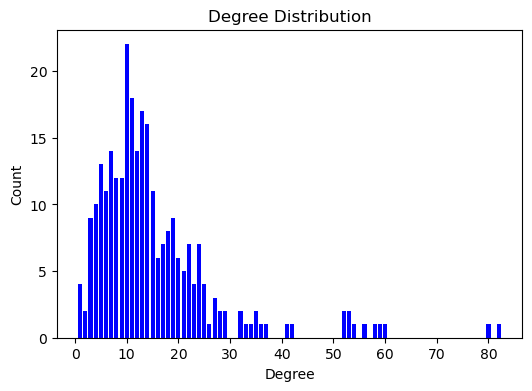

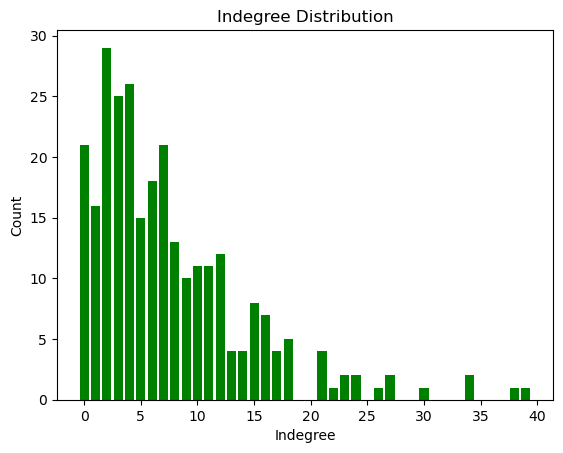

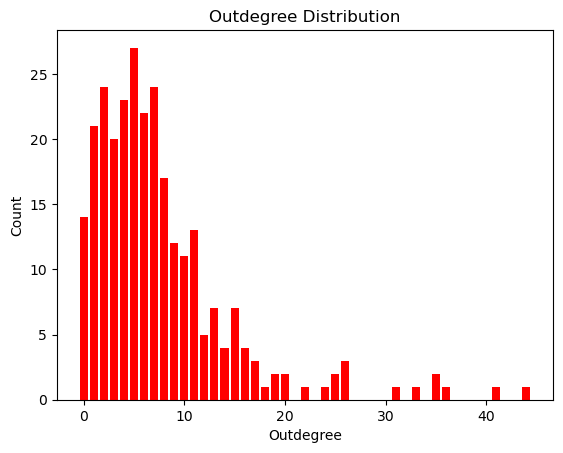

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

fig=plt.figure(figsize=(6,4))
# Degree distribution
degree_sequence = [degree for node, degree in G.degree()]
degree_counts = Counter(degree_sequence)
degrees, counts = zip(*degree_counts.items())

# Plot degree distribution
plt.bar(degrees, counts, width=0.8, color='b')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.savefig("Completedeg.png",dpi=500)
plt.show()

# Indegree distribution
in_degree_sequence = [in_degree for node, in_degree in G.in_degree()]
in_degree_counts = Counter(in_degree_sequence)
in_degrees, in_counts = zip(*in_degree_counts.items())

# Plot indegree distribution
plt.bar(in_degrees, in_counts, width=0.8, color='g')
plt.title("Indegree Distribution")
plt.xlabel("Indegree")
plt.ylabel("Count")
plt.savefig("Complete_indeg.png",dpi=500)
plt.show()

# Outdegree distribution
out_degree_sequence = [out_degree for node, out_degree in G.out_degree()]
out_degree_counts = Counter(out_degree_sequence)
out_degrees, out_counts = zip(*out_degree_counts.items())

# Plot outdegree distribution
plt.bar(out_degrees, out_counts, width=0.8, color='r')
plt.title("Outdegree Distribution")
plt.xlabel("Outdegree")
plt.ylabel("Count")
plt.savefig("Complete_outdeg.png",dpi=500)
plt.show()


In [31]:
degree_threshold = 50  # Adjust this threshold

# Get nodes that exceed the degree threshold
nodes_above_threshold = [node for node, degree in G.degree() if degree > degree_threshold]

# Get node labels
node_labels = nx.get_node_attributes(G, 'label')

# Print or use the labels of nodes above the threshold
labels_above_threshold = [node_labels[node] for node in nodes_above_threshold]
print("Nodes with degree above", degree_threshold, ":", labels_above_threshold)


Nodes with degree above 50 : ['AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'DVA', 'PVCL', 'PVCR']


## Network Motifs

In [20]:
import itertools

def find_motifs(graph, motif_size):
    motifs = []
    for node in graph.nodes():
        neighbors = set(graph.successors(node))
        if len(neighbors) >= motif_size - 1:
            for subset in itertools.combinations(neighbors, motif_size - 1):
                motif = set(subset)
                motif.add(node)
                motifs.append(motif)
    return motifs

# Set the range of motif sizes
min_motif_size = 3
max_motif_size = 5

# Count the motifs for each size
motif_counts = {size: 0 for size in range(min_motif_size, max_motif_size + 1)}

for motif_size in range(min_motif_size, max_motif_size + 1):
    motifs = find_motifs(G, motif_size)
    motif_counts[motif_size] = len(motifs)

# Print the motif counts for each size
print("Motif Counts for Each Size:")
for motif_size, count in motif_counts.items():
    print(f"Motif Size: {motif_size}, Count: {count}")


Motif Counts for Each Size:
Motif Size: 3, Count: 13843
Motif Size: 4, Count: 94193
Motif Size: 5, Count: 627713


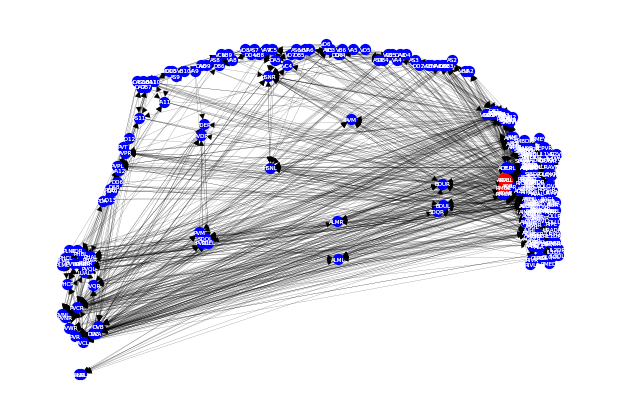

In [70]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the motif size
motif_size = 3

# Find network motifs
motifs = find_motifs(G, motif_size)

# Extract a specific motif for visualization
specific_motif = motifs[0]  # You can choose any motif from the list

# Create a subgraph for the specific motif
subgraph_nodes = list(specific_motif)
subgraph = G.subgraph(subgraph_nodes)

fig=plt.figure(figsize=(6,4))
# Visualize the subgraph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),font_size=4, node_size=50, node_color='blue', font_color='white', width=0.1)
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=4, node_size=70, node_color='red', font_color='white',width=0.3)

plt.savefig("motif3g.png",dpi=500)
plt.show()


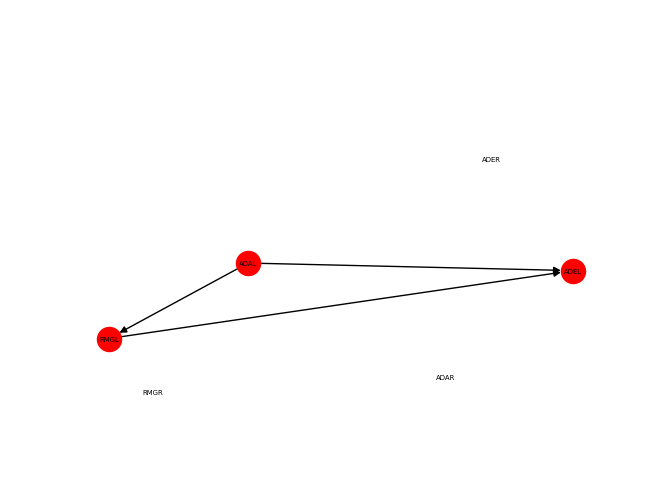

In [30]:
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=5, node_size=300, node_color='red', font_color='black',width=1.0)
plt.savefig("motif3i.png",dpi=500)
plt.show()

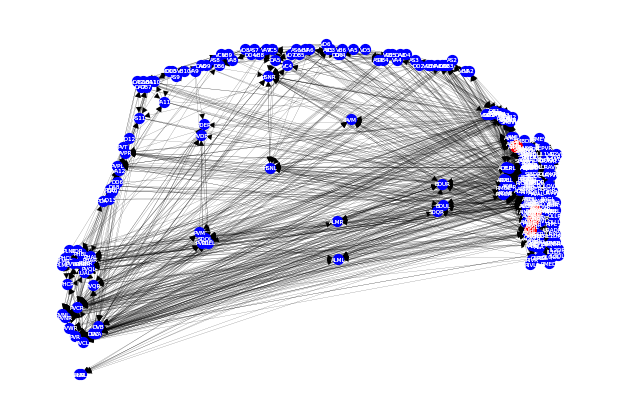

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the motif size
motif_size = 4

# Find network motifs
motifs = find_motifs(G, motif_size)

# Extract a specific motif for visualization
specific_motif = motifs[120]  # You can choose any motif from the list

# Create a subgraph for the specific motif
subgraph_nodes = list(specific_motif)
subgraph = G.subgraph(subgraph_nodes)

fig=plt.figure(figsize=(6,4))
# Visualize the subgraph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),font_size=4, node_size=50, node_color='blue', font_color='white', width=0.1)
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=4, node_size=70, node_color='red', font_color='white',width=0.3)

plt.savefig("motif4g.png",dpi=500)
plt.show()


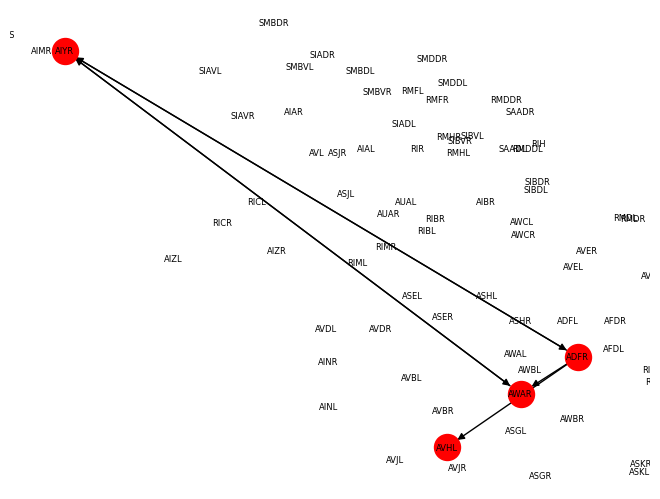

In [47]:
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=6, node_size=350, node_color='red', font_color='black',width=1.0)
plt.savefig("motif4i.png",dpi=500)
plt.show()

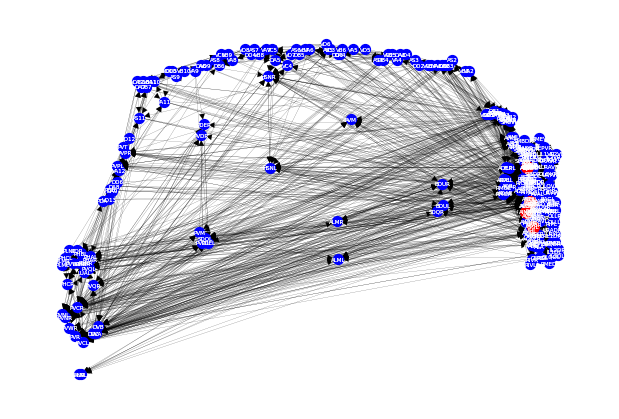

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the motif size
motif_size = 4

# Find network motifs
motifs = find_motifs(G, motif_size)

# Extract a specific motif for visualization
specific_motif = motifs[250]  # You can choose any motif from the list

# Create a subgraph for the specific motif
subgraph_nodes = list(specific_motif)
subgraph = G.subgraph(subgraph_nodes)

fig=plt.figure(figsize=(6,4))
# Visualize the subgraph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),font_size=4, node_size=50, node_color='blue', font_color='white', width=0.1)
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=4, node_size=70, node_color='red', font_color='white',width=0.3)

plt.savefig("motif4g_1.png",dpi=500)
plt.show()


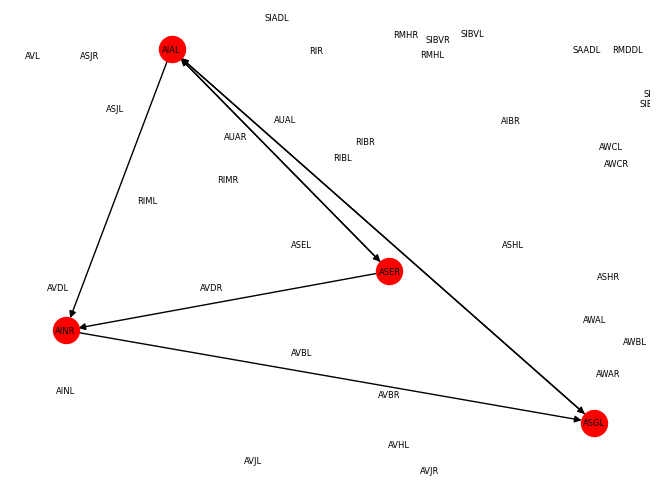

In [60]:
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=6, node_size=350, node_color='red', font_color='black',width=1.0)
plt.savefig("motif4i_1.png",dpi=500)
plt.show()

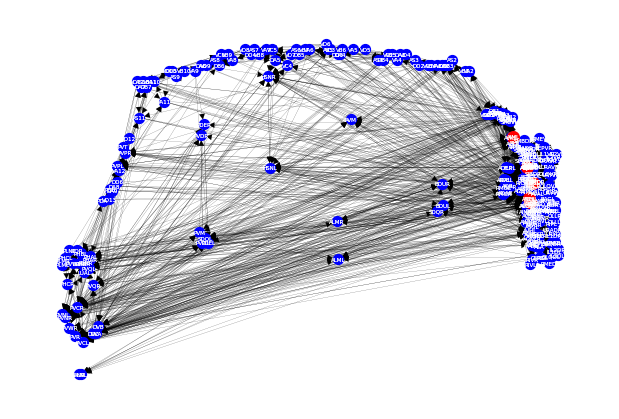

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

# Set the motif size
motif_size = 5

# Find network motifs
motifs = find_motifs(G, motif_size)

# Extract a specific motif for visualization
specific_motif = motifs[200]  # You can choose any motif from the list

# Create a subgraph for the specific motif
subgraph_nodes = list(specific_motif)
subgraph = G.subgraph(subgraph_nodes)

fig=plt.figure(figsize=(6,4))
# Visualize the subgraph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),font_size=4, node_size=50, node_color='blue', font_color='white', width=0.1)
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=4, node_size=70, node_color='red', font_color='white',width=0.3)

plt.savefig("motif5g.png",dpi=500)
plt.show()


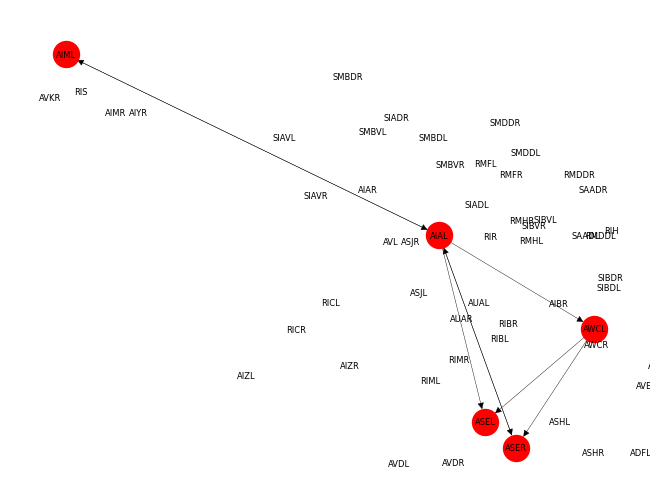

In [63]:
nx.draw(subgraph, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), font_size=6, node_size=350, node_color='red', font_color='black',width=0.3)
plt.savefig("motif5i.png",dpi=500)
plt.show()
